In [1]:
import png
import os
import numpy as np
import matplotlib.pyplot as plt
import keras

/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Importing data 

In [2]:
def import_train_images():
    train_images=[]
    files=os.listdir('/home/pedro/Documents/AutoEncoder/train')
    print(files)
    print(len(files)) #144
    for file in files:
        string='/home/pedro/Documents/AutoEncoder/train/'+file
        image=png.Reader(filename=string)
        w,h,pixels,metadata=image.read_flat()
        image=np.array(pixels)
        if len(image)==226800:
            image=image.reshape((420,540))              
        else:
            image=image.reshape((258,540))
        train_images.append(image)
    return(train_images)


In [3]:
def import_train_labels():
    train_labels=[]
    files=os.listdir('/home/pedro/Documents/AutoEncoder/train_cleaned')
    for file in files:
        string='/home/pedro/Documents/AutoEncoder/train_cleaned/'+file
        image=png.Reader(filename=string)
        w,h,pixels,metadata=image.read_flat()
        image=np.array(pixels)
        if len(image)==226800:
            image=image.reshape((420,540))              
        else:
            image=image.reshape((258,540))
        train_labels.append(image)
    return(train_labels)   

In [4]:
train_images=import_train_images()

['194.png', '167.png', '12.png', '177.png', '14.png', '198.png', '51.png', '110.png', '164.png', '161.png', '180.png', '149.png', '59.png', '24.png', '54.png', '176.png', '213.png', '162.png', '50.png', '179.png', '138.png', '101.png', '15.png', '26.png', '57.png', '90.png', '45.png', '159.png', '117.png', '72.png', '71.png', '74.png', '125.png', '155.png', '104.png', '182.png', '207.png', '129.png', '122.png', '6.png', '141.png', '158.png', '183.png', '137.png', '78.png', '120.png', '17.png', '9.png', '95.png', '215.png', '132.png', '174.png', '195.png', '96.png', '84.png', '206.png', '200.png', '204.png', '36.png', '140.png', '68.png', '203.png', '98.png', '168.png', '21.png', '11.png', '119.png', '173.png', '80.png', '23.png', '102.png', '156.png', '33.png', '131.png', '186.png', '30.png', '20.png', '201.png', '42.png', '89.png', '188.png', '66.png', '210.png', '152.png', '147.png', '53.png', '114.png', '143.png', '165.png', '32.png', '123.png', '150.png', '75.png', '126.png', '116.

In [5]:
train_labels=import_train_labels()

In [6]:
train_images[1]

array([[239, 233, 231, ..., 169, 176, 186],
       [232, 233, 231, ..., 150, 160, 180],
       [235, 238, 236, ..., 157, 151, 154],
       ...,
       [224, 225, 226, ..., 230, 228, 221],
       [228, 226, 224, ..., 246, 248, 252],
       [227, 222, 217, ..., 242, 247, 247]], dtype=uint8)

In [7]:
len(train_images)

144

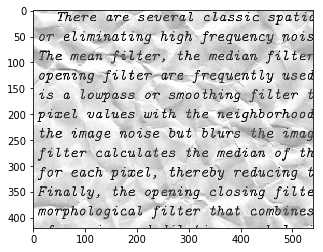

In [8]:
plt.imshow(train_images[50], cmap='gray')

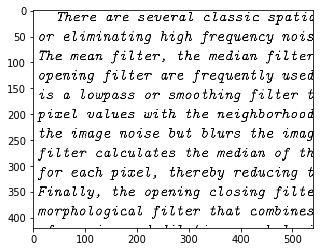

In [9]:
plt.imshow(train_labels[50], cmap='gray')

# Normalizing data

In [10]:
len(train_images[0])

420

In [11]:
def Data_split(img,lab):
    small_images=[]
    small_labels=[]
    big_images=[]
    big_labels=[]
    for i in range(len(img)):
        if len(img[i])==258:
            small_images.append(img[i])
            small_labels.append(lab[i])
        if len(img[i])==420:
            big_images.append(img[i])
            big_labels.append(lab[i])
    small_images=np.array(small_images)
    small_images=small_images.astype('float32')/255
    small_labels=np.array(small_labels)
    small_labels=small_labels.astype('float32')/255
    big_images=np.array(big_images)
    big_images=big_images.astype('float32')/255
    big_labels=np.array(big_labels)
    big_labels=big_labels.astype('float32')/255
    from keras import backend as K
    rows = 258
    cols = 540
    if K.image_data_format() == 'channels_first':
        small_images = small_images.reshape(small_images.shape[0], 1, rows, cols)
        small_labels = small_labels.reshape(small_labels.shape[0], 1, rows, cols)
        input_shape = (1, rows, cols)
    else:
        small_images = small_images.reshape(small_images.shape[0], rows, cols, 1)
        small_labels = small_labels.reshape(small_labels.shape[0], rows, cols, 1)
        input_shape = (rows, cols, 1)
    rows = 420
    cols = 540
    if K.image_data_format() == 'channels_first':
        big_images = big_images.reshape(big_images.shape[0], 1, rows, cols)
        big_labels = big_labels.reshape(big_labels.shape[0], 1, rows, cols)
        input_shape = (1, rows, cols)
    else:
        big_images = big_images.reshape(big_images.shape[0], rows, cols, 1)
        big_labels = big_labels.reshape(big_labels.shape[0], rows, cols, 1)
        input_shape = (rows, cols, 1)
    return((small_images,small_labels,big_images,big_labels))

In [12]:
(small_images,small_labels,big_images,big_labels)=Data_split(train_images,train_labels)

In [13]:
small_images

array([[[[0.9372549 ],
         [0.9137255 ],
         [0.90588236],
         ...,
         [0.6627451 ],
         [0.6901961 ],
         [0.7294118 ]],

        [[0.9098039 ],
         [0.9137255 ],
         [0.90588236],
         ...,
         [0.5882353 ],
         [0.627451  ],
         [0.7058824 ]],

        [[0.92156863],
         [0.93333334],
         [0.9254902 ],
         ...,
         [0.6156863 ],
         [0.5921569 ],
         [0.6039216 ]],

        ...,

        [[0.8156863 ],
         [0.8117647 ],
         [0.8235294 ],
         ...,
         [0.75686276],
         [0.74509805],
         [0.76862746]],

        [[0.8235294 ],
         [0.8392157 ],
         [0.8666667 ],
         ...,
         [0.7607843 ],
         [0.78039217],
         [0.83137256]],

        [[0.85882354],
         [0.87058824],
         [0.8784314 ],
         ...,
         [0.7490196 ],
         [0.80784315],
         [0.87058824]]],


       [[[0.89411765],
         [0.89411765],
         [0.89

In [14]:
len(small_images)

48

In [15]:
len(big_images)

96

In [16]:
from random import shuffle

In [17]:
def Batch_generator():
    while True:
        small_images_s=[]
        big_images_s=[]
        small_labels_s=[]
        big_labels_s=[]
        s=list(range(len(small_images)))
        b=list(range(len(big_images)))
        shuffle(s)
        shuffle(b)
        for i in range(len(small_images)):
            k=s[i]
            small_images_s.append(small_images[k])
            small_labels_s.append(small_labels[k])
        for i in range(len(big_images)):
            k=b[i]
            big_images_s.append(big_images[k])
            big_labels_s.append(big_labels[k])
        for i in range(8):  #8 batches created
            i=i*5 #batch size of 5
            if i==35:
                j=i+2
            else:
                j=i+5
            batch_image=np.array(small_images_s[i:j])
            batch_label=np.array(small_labels_s[i:j])
            yield (batch_image,batch_label)
        for i in range(15): #15 batches created
            i=i*5
            if i==95:
                j=i+4
            else:
                j=i+5
            batch_image=np.array(big_images_s[i:j])
            batch_label=np.array(big_labels_s[i:j])
            yield (batch_image,batch_label)
            

# Creating Model

In [18]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    input_shape = (1, None, 540)
else:
    input_shape = (None, 540, 1)

In [19]:
from keras import models
from keras import layers

In [20]:
network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=input_shape))
network.add(layers.MaxPooling2D((2, 2), padding='same'))
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
network.add(layers.UpSampling2D((2, 2)))
network.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))


In [21]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, None, 540, 32)     320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, 270, 32)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, 270, 32)     9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, 270, 32)     9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, 270, 32)     9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, 270, 32)     9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, 270, 32)     9248      
__________

In [22]:
network2 = keras.utils.multi_gpu_model(network,gpus=2) #model for 2 GPUs

# Compiling Model

In [23]:
network.compile(optimizer='adadelta', loss='binary_crossentropy')
network2.compile(optimizer='adadelta', loss='binary_crossentropy')

# Training Model

In [24]:
gen=Batch_generator()
history = network2.fit_generator(generator=gen,steps_per_epoch=23,epochs=100)

Epoch 1/100
23/23 [==============================] - 3s 135ms/step - loss: 0.4215
Epoch 2/100
23/23 [==============================] - 2s 66ms/step - loss: 0.3629
Epoch 3/100
23/23 [==============================] - 2s 65ms/step - loss: 0.3512
Epoch 4/100
23/23 [==============================] - 2s 65ms/step - loss: 0.2877
Epoch 5/100
23/23 [==============================] - 1s 64ms/step - loss: 0.2299
Epoch 6/100
23/23 [==============================] - 1s 65ms/step - loss: 0.1950
Epoch 7/100
23/23 [==============================] - 1s 64ms/step - loss: 0.1775
Epoch 8/100
23/23 [==============================] - 1s 64ms/step - loss: 0.1684
Epoch 9/100
23/23 [==============================] - 1s 65ms/step - loss: 0.1610
Epoch 10/100
23/23 [==============================] - 2s 65ms/step - loss: 0.1535
Epoch 11/100
23/23 [==============================] - 2s 65ms/step - loss: 0.1472
Epoch 12/100
23/23 [==============================] - 1s 65ms/step - loss: 0.1402
Epoch 13/100
23/23 [====

# Saving Model and training results

In [25]:
import h5py               #save the network for 1 gpu
network.set_weights(network2.get_weights())
network.save('trained_network_v2_multi_size.h5')

In [26]:
result=network2.predict(np.array([big_images[5]]))

In [27]:
result

array([[[[0.8769199 ],
         [0.98888177],
         [0.99695045],
         ...,
         [0.9952304 ],
         [0.9910607 ],
         [0.92870504]],

        [[0.97279704],
         [0.9996118 ],
         [0.99985063],
         ...,
         [0.9992399 ],
         [0.99846196],
         [0.9525697 ]],

        [[0.992515  ],
         [0.9998822 ],
         [0.99994767],
         ...,
         [0.99874413],
         [0.9985936 ],
         [0.9631831 ]],

        ...,

        [[0.99679595],
         [0.9997013 ],
         [0.99992824],
         ...,
         [0.9684945 ],
         [0.9360283 ],
         [0.8423783 ]],

        [[0.99051595],
         [0.9981742 ],
         [0.99955744],
         ...,
         [0.99273974],
         [0.98331106],
         [0.9038739 ]],

        [[0.9223298 ],
         [0.9611019 ],
         [0.98182034],
         ...,
         [0.95399255],
         [0.933489  ],
         [0.82080257]]]], dtype=float32)

In [28]:
result=result*255
result=result.astype('uint8')
result=result.reshape(420,540)

In [29]:
result

array([[223, 252, 254, ..., 253, 252, 236],
       [248, 254, 254, ..., 254, 254, 242],
       [253, 254, 254, ..., 254, 254, 245],
       ...,
       [254, 254, 254, ..., 246, 238, 214],
       [252, 254, 254, ..., 253, 250, 230],
       [235, 245, 250, ..., 243, 238, 209]], dtype=uint8)

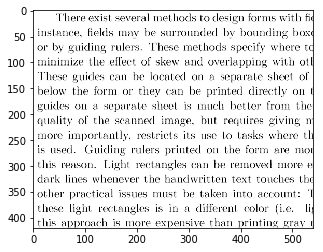

In [30]:
plt.imshow(result, cmap='gray')

# Importing Test Data

In [31]:
def import_test_images():
    test_images=[]
    files=os.listdir('/home/pedro/Documents/AutoEncoder/test')
    print(files)
    for file in files:
        string='/home/pedro/Documents/AutoEncoder/test/'+file
        image=png.Reader(filename=string)
        w,h,pixels,metadata=image.read_flat()
        image=np.array(pixels)
        if len(image)==226800:
            image=image.reshape((420,540))              
        else:
            image=image.reshape((258,540))
        test_images.append(image)
    return(test_images)

In [32]:
test_images=import_test_images()

['205.png', '142.png', '196.png', '145.png', '49.png', '37.png', '184.png', '76.png', '7.png', '115.png', '34.png', '22.png', '25.png', '106.png', '1.png', '52.png', '103.png', '64.png', '70.png', '31.png', '181.png', '100.png', '175.png', '139.png', '67.png', '157.png', '4.png', '13.png', '28.png', '97.png', '130.png', '211.png', '187.png', '148.png', '40.png', '166.png', '214.png', '163.png', '19.png', '43.png', '199.png', '127.png', '202.png', '46.png', '133.png', '94.png', '121.png', '193.png', '154.png', '208.png', '88.png', '91.png', '58.png', '160.png', '82.png', '112.png', '79.png', '178.png', '16.png', '73.png', '151.png', '124.png', '55.png', '109.png', '85.png', '118.png', '61.png', '172.png', '169.png', '10.png', '190.png', '136.png']


In [33]:
test_images[1]

array([[239, 233, 231, ..., 169, 176, 186],
       [232, 233, 231, ..., 150, 160, 180],
       [235, 238, 236, ..., 157, 151, 154],
       ...,
       [224, 225, 226, ..., 252, 249, 251],
       [228, 226, 224, ..., 245, 247, 250],
       [227, 222, 217, ..., 242, 247, 247]], dtype=uint8)

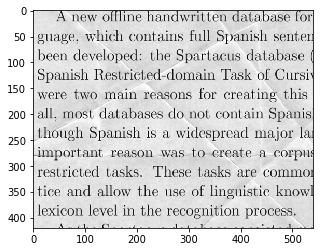

In [34]:
plt.imshow(test_images[50], cmap='gray')

# Normalizing Test Data

In [35]:
(test_small_images,ignore,test_big_images,ignore2)=Data_split(test_images,test_images)
#2 values ignored because we have no test labels

In [36]:
test_small_images[1]

array([[[0.88235295],
        [0.90588236],
        [0.9137255 ],
        ...,
        [0.88235295],
        [0.8862745 ],
        [0.8862745 ]],

       [[0.9098039 ],
        [0.9098039 ],
        [0.90588236],
        ...,
        [0.8901961 ],
        [0.89411765],
        [0.90588236]],

       [[0.9137255 ],
        [0.9019608 ],
        [0.8901961 ],
        ...,
        [0.89411765],
        [0.8980392 ],
        [0.87058824]],

       ...,

       [[0.8980392 ],
        [0.9019608 ],
        [0.8862745 ],
        ...,
        [0.59607846],
        [0.6313726 ],
        [0.5686275 ]],

       [[0.9098039 ],
        [0.92156863],
        [0.90588236],
        ...,
        [0.6039216 ],
        [0.5686275 ],
        [0.47058824]],

       [[0.8745098 ],
        [0.8901961 ],
        [0.9019608 ],
        ...,
        [0.6039216 ],
        [0.5764706 ],
        [0.5647059 ]]], dtype=float32)

# Running network on test data

In [43]:
test_big_result=network2.predict(test_big_images)

In [44]:
test_small_result=network2.predict(test_small_images)

In [45]:
test_big_result[1]

array([[[0.87611943],
        [0.98960894],
        [0.9973436 ],
        ...,
        [0.9790467 ],
        [0.96791416],
        [0.8904615 ]],

       [[0.9734535 ],
        [0.999663  ],
        [0.9998683 ],
        ...,
        [0.9896304 ],
        [0.98521256],
        [0.8927097 ]],

       [[0.9930132 ],
        [0.9999039 ],
        [0.9999547 ],
        ...,
        [0.9844125 ],
        [0.98498005],
        [0.8877097 ]],

       ...,

       [[0.99714905],
        [0.9997253 ],
        [0.99993   ],
        ...,
        [0.9999242 ],
        [0.9998209 ],
        [0.9940544 ]],

       [[0.9912503 ],
        [0.99834514],
        [0.999602  ],
        ...,
        [0.99947315],
        [0.99771404],
        [0.9665109 ]],

       [[0.92654204],
        [0.963764  ],
        [0.98316634],
        ...,
        [0.97076213],
        [0.9400711 ],
        [0.7781516 ]]], dtype=float32)

In [47]:
example=test_big_result[10]
example=example*255
example=example.astype('uint8')
example=example.reshape(420,540)

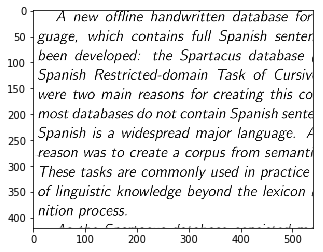

In [48]:
plt.imshow(example, cmap='gray')

In [49]:
pre_example=test_big_images[10]
pre_example=pre_example*255
pre_example=pre_example.astype('uint8')
pre_example=pre_example.reshape(420,540)

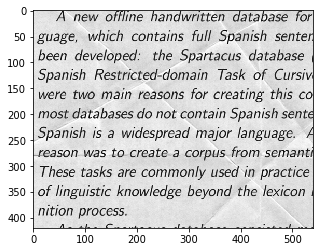

In [50]:
plt.imshow(pre_example, cmap='gray')